# **`Lec-4` :** Classification (Decision tree Algorithm)

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [5]:
# Import Dataset from seaborn
df = sns.load_dataset('titanic')

X = df[['pclass','sex','age','sibsp','parch','fare']]
y=  df['survived']

---

Categorical data cannot typically be directly handled by machine learning algorithms, as most algorithms are primarily designed to operate with numerical data only. Therefore, before categorical features can be used as inputs to machine learning algorithms, they must be **`encoded`** as numerical values.

In [6]:
X = pd.get_dummies(X,columns = ['sex'])

jab ham billions of rows ke sath kaam kartei hai to phir data ko process karna mushkil hota hai , time bhi zyada leta hai, is lia ham unhe binary mei convet kartei hai, 0 and 1 mei, to processing time bhi kam ho jaata hai aur algorithm ko samajh bhi aati hai.

Maslan jese ke uper waaale `code` ne niche wala kaam kiya hai.

---

In [7]:
X

,pclass,age,sibsp,parch,fare,sex_female,sex_male
0,3,22.0,1,0,7.2500,False,True
1,1,38.0,1,0,71.2833,True,False
2,3,26.0,0,0,7.9250,True,False
3,1,35.0,1,0,53.1000,True,False
4,3,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,False,True
887,1,19.0,0,0,30.0000,True,False
888,3,NaN,1,2,23.4500,True,False
889,1,26.0,0,0,30.0000,False,True


---

## Now I have to train model based on the above data of X and y.

In [8]:
X['age'].fillna(X['age'].mean(),inplace= True)

C:\Users\Shaheer Ali\AppData\Local\Temp\ipykernel_7304\3717634495.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['age'].fillna(X['age'].mean(),inplace= True)


In [9]:
X.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_female    0
sex_male      0
dtype: int64

### **`1:`** Build a Model:

In [11]:
# splitting X and y into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

### **`2:`** Training The Model:

In [12]:
model = model.fit(X_train,y_train)

### **`3:`** Testing the Model With Metrics:

#### `1 : Acuracy Score:`

In [14]:
prediction = model.predict(X_test)

# testing with the accuracy_score metrics

print('Accuracy of the Model is :', accuracy_score(y_test, prediction))


Accuracy of the Model is : 0.8435754189944135


#### `2 : Precision Score :`
Precision measures the proportion of true positive predictions among all positive predictions.

``` jab bhi ``` ture ``` aa jaey to iska matlab ye hota hai ke ye thek hai , koi error nahi ```, lekin `jab` false `aa jaey to iska matlab ye hota hai ke ye chahei positive ho ya negative is mei error hai , answer iske opposite hai, jab ke ye show kuch aur kar raha hai`

` Precision ` jo model ne batai hai un me se kitne theek hai? iska yahi matlab hai.

                        True Positives

                Ture Positives + False Positives

In [15]:
from sklearn.metrics import precision_score

print('Precision Score of the Model is : ', precision_score(y_test,prediction))

Precision Score of the Model is :  0.7647058823529411


#### `3 : Recall Score :`
Recall measures the proportion of true positive predictions among all actual positive instances(`rows is called instances`).

                            `True Positives`

                    True Positives + False Negative

In [16]:
from sklearn.metrics import recall_score

print('Recall Score of the Model is : ' , recall_score(y_test, prediction))

Recall Score of the Model is :  0.7090909090909091


#### `4 : F1 Score:`

In [17]:
from sklearn.metrics import f1_score

print('F1_Score of the Model is : ', f1_score(y_test, prediction))

# f1_score is just the mean of the two values, that is y_test and prediction in this case

F1_Score of the Model is :  0.7358490566037735


---

In [40]:
# pclass = input('Enter the P Class :  ')
# age = input('Enter the Age :  ')
# sibsp = input('Enter the Number of Siblings :  ')
# parch = input('Enter the Number of Parent Children :  ')
# fare = input('Enter The Fare :  ')
# sex_female = input('Enter the Female Sex in Binary (True or False)')
# sex_male = input('Enter the Male Sex in Binary True or False')

In [18]:

# predicting the Values of user input for testing and checking both sides of the test values (X, & y)

#model.predict([[pclass, age, sibsp, parch, fare, sex_female, sex_male]])

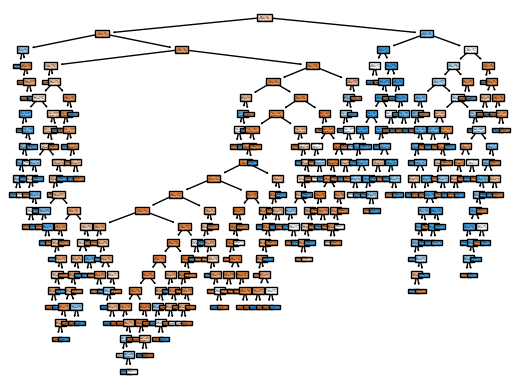

In [42]:
tree.plot_tree(model.fit(X,y), filled = True)
plt.show()
# plt.savefig("tree.png")

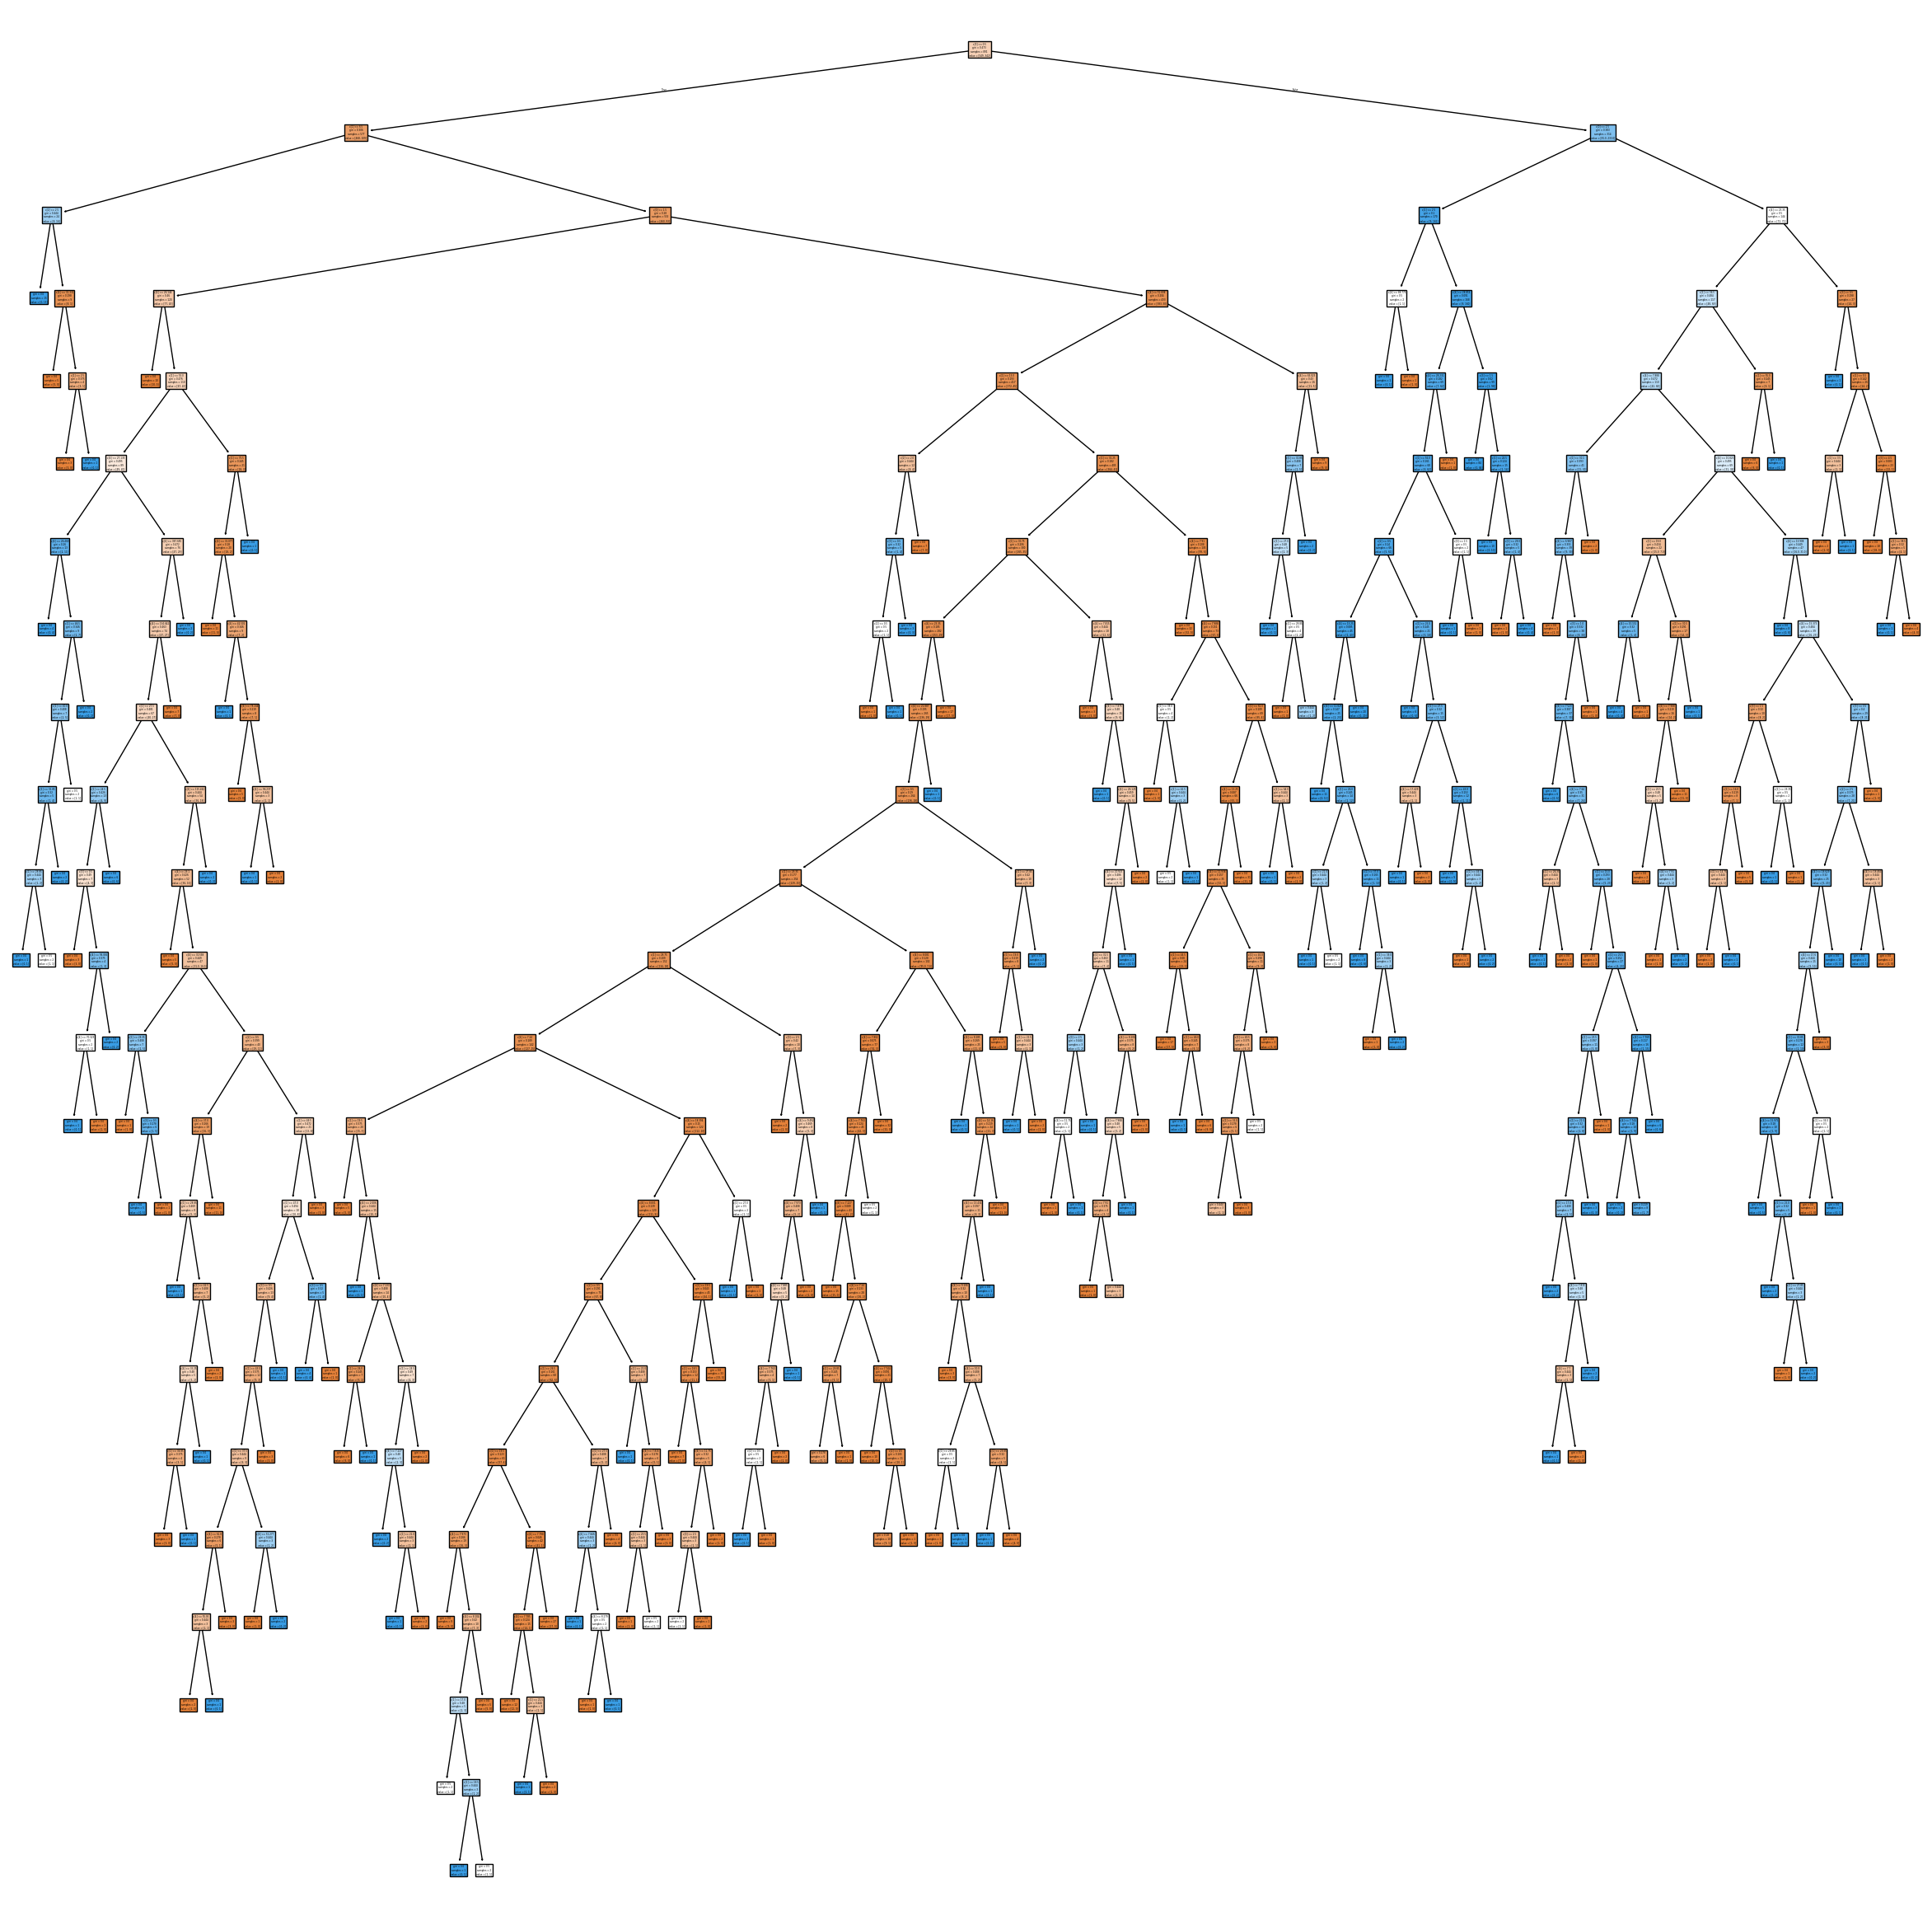

In [21]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(30,30))
tree.plot_tree(model.fit(X,y), filled = True)
plt.savefig("Decision_tree.pdf",format = "pdf" , dpi= 300)
plt.show()


In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix of the Model is : ", cm)

Confusion Matrix of the Model is :  [[112  12]
 [ 16  39]]


Text(0.5, 23.52222222222222, 'Predicted label')

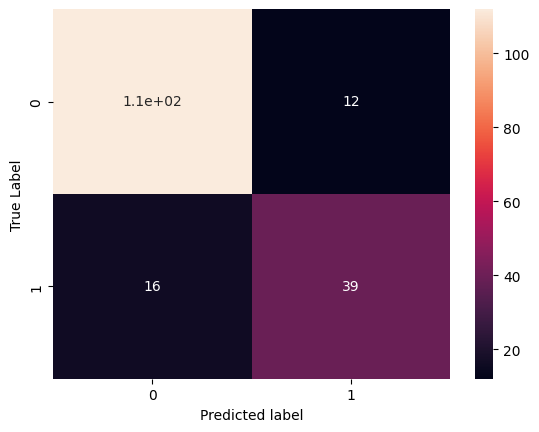

In [23]:
sns.heatmap(cm, annot = True)
plt.ylabel('True Label')
plt.xlabel('Predicted label')
